In [25]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay


1. Carga de datos:
- Descarga y carga el dataset «Titanic» desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
- Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.


In [26]:
data_path_train='../ejercicios_core/data/train.csv'
df_train = pd.read_csv(data_path_train)

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
data_path_test = '../ejercicios_core/data/test.csv'

df_test = pd.read_csv(data_path_test)

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
##Revision inicial de train
utils.exploracion_inicial(df_train)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

In [29]:
# Define the file path
file_path = '../ejercicios_core/data'
columns_to_process: List[str] = ['Pclass', 'Embarked', 'Sex','SibSp','Parch','Cabin']
unique_values_dict = utils.get_unique_values(df_train, columns_to_process)
utils.save_dict_as_json(unique_values_dict,file_path , "unique_values.json")

Dictionary saved to ../ejercicios_core/data\unique_values.json


In [30]:
##revisar valores nulos
utils.identificar_valores_faltantes(df_train)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
Cabin,204,687,77.10
Age,714,177,19.87
Embarked,889,2,0.22
PassengerId,891,0,0.00
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
SibSp,891,0,0.00
Parch,891,0,0.00


In [31]:
# Rellenar valores nulos de la columna Cabin con la palabra 'Unknown'
df_train['Cabin'] = df_train['Cabin'].fillna('Unknown')


In [32]:
##Transformamos a categoria y string las que correspondan
categorical_columns = ['Pclass', 'Embarked', 'Cabin', 'Sex']
df_train = utils.transform_columns(df_train,categorical_columns , 'category')
df_train = utils.transform_columns(df_train, ['Name', 'Ticket'], 'str')
# Check the type of elements in the columns
print(type(df_train['Name'].iloc[0]))  # Should return <class 'str'>
print(type(df_train['Ticket'].iloc[0]))  # Should return <class 'str'>

<class 'str'>
<class 'str'>


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 65.8+ KB


In [34]:
# Se llena los valores nulos de age con la media la combinacion de PClass con SibSP para tener un dato mas real 
# Agrupamos por Pclass y SibSp y calculamos la media de Age
age_means = df_train.groupby(['Pclass', 'SibSp'])['Age'].transform('mean')

# Llenamos los valores nulos de Age con las medias calculadas
df_train['Age'] = df_train['Age'].fillna(age_means)

# Rellenar con la media general si aún quedan nulos
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

#print('Valores nulos en Age:',df_train['Age'].isnull().sum())  # Debería imprimir 0

# Calcular la moda de la columna Embarked
mode_embarked = df_train['Embarked'].mode()[0]  # [0] para tomar el primer valor en caso de empate

# Rellenar los valores nulos con la moda
df_train['Embarked'] = df_train['Embarked'].fillna(mode_embarked)

#print('Valores nulos en Embarked:',df_train['Embarked'].isnull().sum())  # Debería imprimir 0

utils.identificar_valores_faltantes(df_train)


Valores faltantes en el dataset

C:\Users\ENRIF\AppData\Local\Temp\ipykernel_34416\372692281.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df_train.groupby(['Pclass', 'SibSp'])['Age'].transform('mean')


,datos sin NAs en q,Na en q,Na en %
PassengerId,891,0,0.0
Survived,891,0,0.0
Pclass,891,0,0.0
Name,891,0,0.0
Sex,891,0,0.0
Age,891,0,0.0
SibSp,891,0,0.0
Parch,891,0,0.0
Ticket,891,0,0.0
Fare,891,0,0.0


In [35]:
utils.verificacion_elementos_duplicados(df_train)

Cantidad de filas duplicadas:  0


3. Creación de nuevas características:
- Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
    * Tamaño de la familia: Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
    * Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.
    * Categoría de tarifa: Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
    * Título del pasajero: Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).



In [36]:
# Create new feature: Family size all their family and the person
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1


In [37]:
# Crear la columna binaria 'Cabin_Known'
df_train['Cabin_Known'] = df_train['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,0


In [38]:
# Create new feature: IsAlone
df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)
# Create new feature: Fare per person
df_train['FarePerPerson'] = df_train['Fare'] / df_train['FamilySize']

df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Cabin_Known,IsAlone,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0,0,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,0,1,7.92500


In [39]:
df_train['Fare'].describe()

# Definir los rangos (bins) y las etiquetas
bins = [0, 20, 100, df_train['Fare'].max()]  # Puedes ajustar estos valores según el análisis
labels = ['Low', 'Medium', 'High']

# Crear la columna categórica 'Fare_Category'
df_train['Fare_Category'] = pd.cut(df_train['Fare'], bins=bins, labels=labels, include_lowest=True)

df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Cabin_Known,IsAlone,FarePerPerson,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0,0,3.62500,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,35.64165,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,0,1,7.92500,Low


In [40]:
# Extraer el título de cada pasajero usando una expresión regular
df_train['Title'] = df_train['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

# Ver los títulos únicos encontrados
print(df_train['Title'].unique())

df_train.head(3)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Cabin_Known,IsAlone,FarePerPerson,Fare_Category,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0,0,3.62500,Low,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,35.64165,Medium,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,0,1,7.92500,Low,Miss


4. Evaluación de nuevas características:
- Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
- Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.


In [41]:
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    category
 3   Name           891 non-null    object  
 4   Sex            891 non-null    category
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          891 non-null    category
 11  Embarked       891 non-null    category
 12  FamilySize     891 non-null    int64   
 13  Cabin_Known    891 non-null    int64   
 14  IsAlone        891 non-null    int32   
 15  FarePerPerson  891 non-null    float64 
 16  Fare_Category  891 non-null    category
 17  Title          891 non-null    obje

In [43]:
### Transfom de los datos con pipeline
# Separar características numéricas y categóricas
dato_numerico = X.select_dtypes(include=['float64', 'int32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Definir transformaciones
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# En este dataset no hay categóricas, pero se puede añadir una columna categórica ficticia para la práctica
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, dato_numerico),
        ('cat', categorical_transformer, categorical_features)
    ])

# Integrar en un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar preprocesamiento al conjunto de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)

# Aplicar preprocesamiento al conjunto de prueba
X_test_transformed = pipeline.transform(X_test)



print("Preprocesamiento completado. Datos transformados listos para modelar.")


Preprocesamiento completado. Datos transformados listos para modelar.


In [44]:
print("Dimensiones de X_train_transformed:", X_train_transformed.shape)
print("Dimensiones de X_test_transformed:", X_test_transformed.shape)

Dimensiones de X_train_transformed: (668, 1340)
Dimensiones de X_test_transformed: (223, 1340)


Random Forest Metrics:
[[121  13]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       134
           1       0.83      0.72      0.77        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223

Random Forest ROC-AUC Score: 0.895061210799933


c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:17:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Metrics:
[[110  24]
 [ 20  69]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       134
           1       0.74      0.78      0.76        89

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.80      0.80      0.80       223

XGBoost ROC-AUC Score: 0.88223209793728


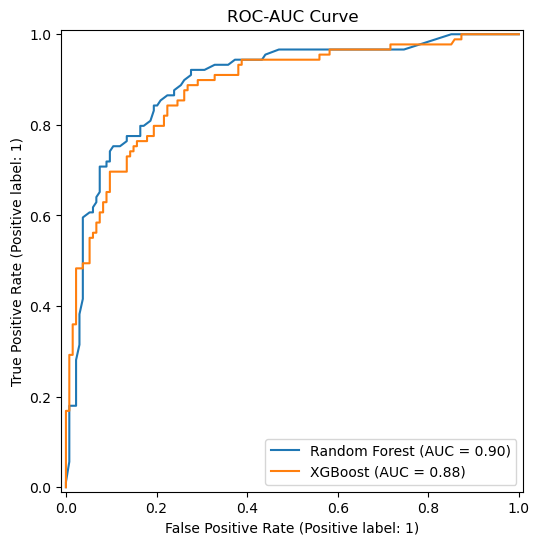

In [45]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Predict with Random Forest
rf_pred = rf_model.predict(X_test_transformed)
rf_pred_proba = rf_model.predict_proba(X_test_transformed)[:, 1]

# Evaluate Random Forest
print("Random Forest Metrics:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
print(f"Random Forest ROC-AUC Score: {rf_roc_auc}")

# Train XGBoost Classifier with enable_categorical
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, enable_categorical=True)
xgb_model.fit(X_train_transformed, y_train)

# Predict with XGBoost
xgb_pred = xgb_model.predict(X_test_transformed)
xgb_pred_proba = xgb_model.predict_proba(X_test_transformed)[:, 1]

# Evaluate XGBoost
print("\nXGBoost Metrics:")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_proba)
print(f"XGBoost ROC-AUC Score: {xgb_roc_auc}")

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(rf_model, X_test_transformed, y_test, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_estimator(xgb_model, X_test_transformed, y_test, name="XGBoost", ax=plt.gca())
plt.title("ROC-AUC Curve")
plt.show()

In [46]:
###Dataset original

X_original = df_train.drop(['Survived','FamilySize','Cabin_Known','IsAlone','FarePerPerson','Fare_Category','Title'], axis=1)
y_original = df_train['Survived']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y_original, test_size=0.25, random_state=42)

In [49]:
### Transfom de los datos con pipeline
# Separar características numéricas y categóricas
dato_numerico = X_original.select_dtypes(include=['float64', 'int32']).columns.tolist()
categorical_features = X_original.select_dtypes(include=['category', 'object']).columns.tolist()

# Definir transformaciones
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# En este dataset no hay categóricas, pero se puede añadir una columna categórica ficticia para la práctica
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, dato_numerico),
        ('cat', categorical_transformer, categorical_features)
    ])

# Integrar en un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar preprocesamiento al conjunto de entrenamiento
X_train_transformed_original = pipeline.fit_transform(X_train_original)

# Aplicar preprocesamiento al conjunto de prueba
X_test_transformed_original = pipeline.transform(X_test_original)



print("Preprocesamiento completado. Datos transformados listos para modelar.")


Preprocesamiento completado. Datos transformados listos para modelar.


Random Forest Metrics:
[[119  15]
 [ 26  63]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       134
           1       0.81      0.71      0.75        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223

Random Forest ROC-AUC Score: 0.8820224719101124


c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:23:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Metrics:
[[112  22]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       134
           1       0.75      0.74      0.75        89

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

XGBoost ROC-AUC Score: 0.8668874727486164


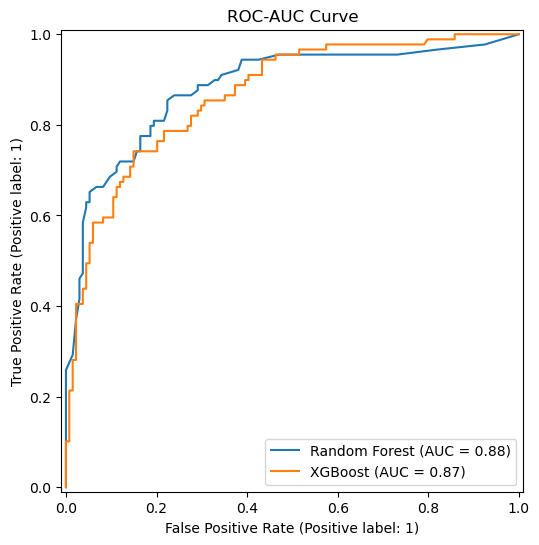

In [51]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed_original, y_train)

# Predict with Random Forest
rf_pred = rf_model.predict(X_test_transformed_original)
rf_pred_proba = rf_model.predict_proba(X_test_transformed_original)[:, 1]

# Evaluate Random Forest
print("Random Forest Metrics:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
print(f"Random Forest ROC-AUC Score: {rf_roc_auc}")

# Train XGBoost Classifier with enable_categorical
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, enable_categorical=True)
xgb_model.fit(X_train_transformed_original, y_train)

# Predict with XGBoost
xgb_pred = xgb_model.predict(X_test_transformed_original)
xgb_pred_proba = xgb_model.predict_proba(X_test_transformed_original)[:, 1]

# Evaluate XGBoost
print("\nXGBoost Metrics:")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_proba)
print(f"XGBoost ROC-AUC Score: {xgb_roc_auc}")

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(rf_model, X_test_transformed_original, y_test, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_estimator(xgb_model, X_test_transformed_original, y_test, name="XGBoost", ax=plt.gca())
plt.title("ROC-AUC Curve")
plt.show()

Existe una mejora entre el dataset con feature engineering y el dataset original, segun siguiente dato:
Dataset original: RandomForest (AUC = 0.88) y XGBoost(AUC = 0.87)
Dataset con Feature engineering: RandomForest (AUC = 0.90) y XGBoost(AUC = 0.88)